# Tworzenie czystej klatki
Ten notebook implementuje algorytm tworzenia czystej klatki opisany w artykule „Interactive Digital Photomontage” autorstwa Aseema Agarwali i innych (SIGGRAPH 2004).

In [10]:
# Import necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Krok 1: Wczytaj obrazy wejściowe
Wczytaj obrazy, które będą używane do fotomontażu.

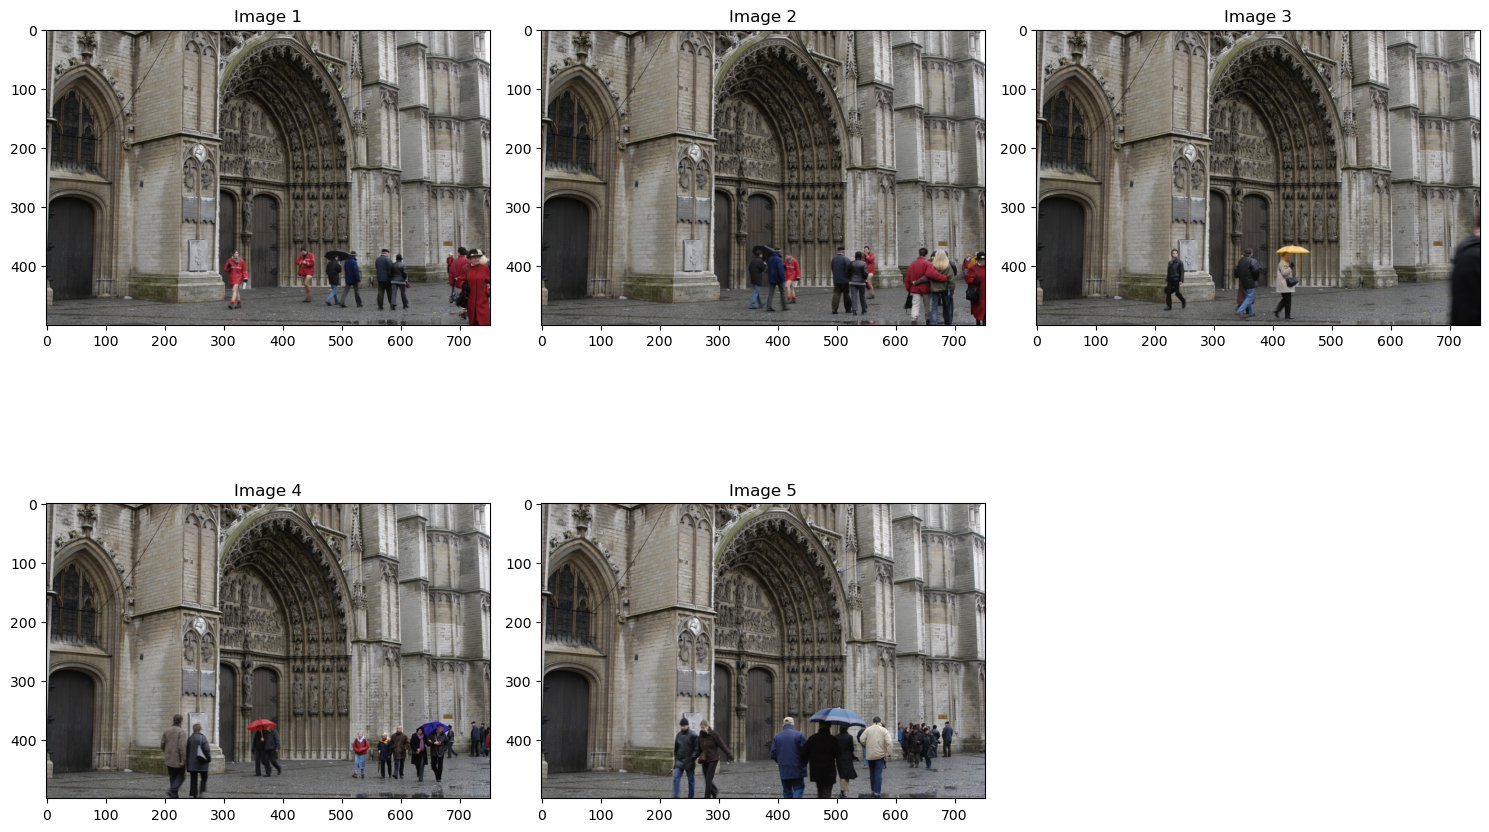

In [11]:
# Load images with error handling
def load_image(path):
    image = cv2.imread(path)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {path}")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define folder path
folder_path = 'cathedral'

# Get all image paths from the folder
image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Load images
images = []
try:
    for path in image_paths:
        images.append(load_image(path))
except FileNotFoundError as e:
    print(e)
    raise

# Display images
plt.figure(figsize=(15, 10))
for i, image in enumerate(images):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid as needed
    plt.imshow(image)
    plt.title(f'Image {i + 1}')
plt.tight_layout()
plt.show()

## Krok 2: Zaimplementuj algorytm
Zaimplementuj algorytm tworzenia czystej klatki poprzez połączenie obrazów wejściowych.
W tym kroku wykorzystamy podejście minimalizacji energii (seam carving) do inteligentnego łączenia obrazów.

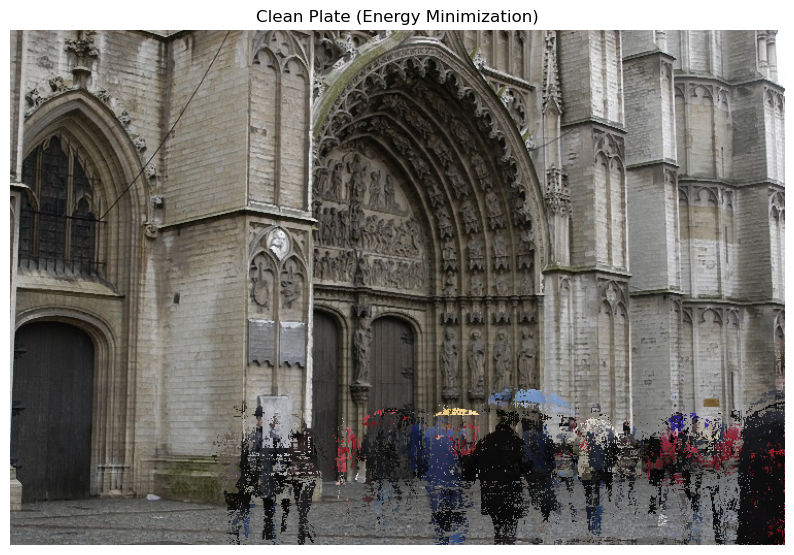

In [12]:
# Define a function to compute the energy map of an image
def compute_energy(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    energy = np.abs(sobel_x) + np.abs(sobel_y)
    return energy

# Ensure there are images to process
if len(images) < 2:
    raise ValueError("At least two images are required for this operation.")

# Initialize the clean plate with the first image
clean_plate = images[0]
clean_plate_energy = compute_energy(clean_plate)

# Iterate through the remaining images and combine based on energy minimization
for i in range(1, len(images)):
    current_image = images[i]
    current_energy = compute_energy(current_image)
    
    # Create a mask where the current image has lower energy
    mask = current_energy < clean_plate_energy
    
    # Update the clean plate and its energy map
    clean_plate = np.where(mask[..., None], current_image, clean_plate)
    clean_plate_energy = np.minimum(clean_plate_energy, current_energy)

# Display the result
plt.figure(figsize=(10, 7))
plt.imshow(clean_plate)
plt.title('Clean Plate (Energy Minimization)')
plt.axis('off')
plt.show()

## Krok 3: Zapisz wynik
Zapisz wynikowy obraz czystej klatki.

In [13]:
# Save the clean plate image
clean_plate_bgr = cv2.cvtColor(clean_plate, cv2.COLOR_RGB2BGR)
cv2.imwrite('clean_plate.jpg', clean_plate_bgr)

True